# 💧 ABS Waterfall Simulation

This notebook provides a clean interface for running your ABS waterfall engine.

**Structure:**
1️⃣ Load YAML configuration  
2️⃣ Initialize engine  
3️⃣ Run simulation  
4️⃣ Display results (WAL, DM, repayment schedule)  
5️⃣ Plot waterfall and tranche balances

---

In [1]:
import sys, os
sys.path.append(os.path.abspath("../src"))

In [2]:
# === 1️⃣ Imports and setup ===
import yaml
from pprint import pprint
from abs_project.sim.loader import load_from_dict
from abs_project.sim.engine import WaterfallEngine
from abs_project.sim.plots import plot_waterfall, plot_tranche_balances
from abs_project.sim.utils import tranche_repayment_summary
from abs_project.abs_deal_generator import generate_abs_deal, export_to_yaml

# 1️⃣ Generate a random ABS deal
abs_deal = generate_abs_deal()

# 2️⃣ Export to YAML and get the path
yaml_path = export_to_yaml(abs_deal)

print(f"✅ YAML file generated at: {yaml_path}")



✅ YAML file created: /workspaces/ABS-Simulator/abs_project/src/data/deals/AUTOFR_2025-1.yaml
✅ YAML file generated at: /workspaces/ABS-Simulator/abs_project/src/data/deals/AUTOFR_2025-1.yaml


## 🧾 2️⃣ Load Deal Configuration

In [3]:
import yaml
with open(yaml_path, "r") as f:
    abs_data = yaml.safe_load(f)

print(f"✅ Loaded deal configuration: {abs_data['deal']['deal_name']}")


✅ Loaded deal configuration: AUTOFR 2025-1


## ⚙️ 3️⃣ Initialize Simulation Engine

In [5]:
from abs_project.sim.scenario_runner import run_scenarios, style_results, plot_scenario_summary
from abs_project.sim.utils import tranche_repayment_summary, show_scenario_details
from abs_project.sim.plots import plot_waterfall, plot_tranche_balances
from abs_project.sim.engine import Assumptions, WaterfallEngine
from abs_project.sim.loader import load_from_dict

# --- 1️⃣ Define scenarios ---
scenarios = [
    Assumptions(CPR_annual=0.04, CDR_annual=0.01, recovery_rate=0.40, scenario_name="Base"),
    Assumptions(CPR_annual=0.08, CDR_annual=0.02, recovery_rate=0.30, scenario_name="Stress"),
]

# --- 2️⃣ Run multiple simulations ---
df_results = run_scenarios(abs_data, scenarios, base_index_annual=0.026, plot=False)

# --- 3️⃣ Display the table nicely ---
from IPython.display import display
display(style_results(df_results))


Scenario,Tranche,WAL (yrs),DM (bps),Total Interest (€),Total Principal (€),Total Residual (€),CPR (%),CDR (%),Recovery (%)
Base,A,1.73,71,"6,892,092","114,703,735",0,4.0,1.0,40.0
Base,B,3.72,148,"1,548,440","10,439,010",0,4.0,1.0,40.0
Base,C,4.03,307,"1,549,623","7,747,255",0,4.0,1.0,40.0
Base,Equity,0.00,nan,0,0,0,4.0,1.0,40.0
Base,Equity_residual,0.00,0,0,0,"8,951,193",4.0,1.0,40.0
Stress,A,1.50,69,"5,972,224","114,703,735",0,8.0,2.0,30.0
Stress,B,3.30,149,"1,376,442","10,439,010",0,8.0,2.0,30.0
Stress,C,3.61,314,"1,387,069","7,747,255",0,8.0,2.0,30.0
Stress,Equity,0.00,nan,0,0,0,8.0,2.0,30.0
Stress,Equity_residual,0.00,0,0,0,"8,898,067",8.0,2.0,30.0


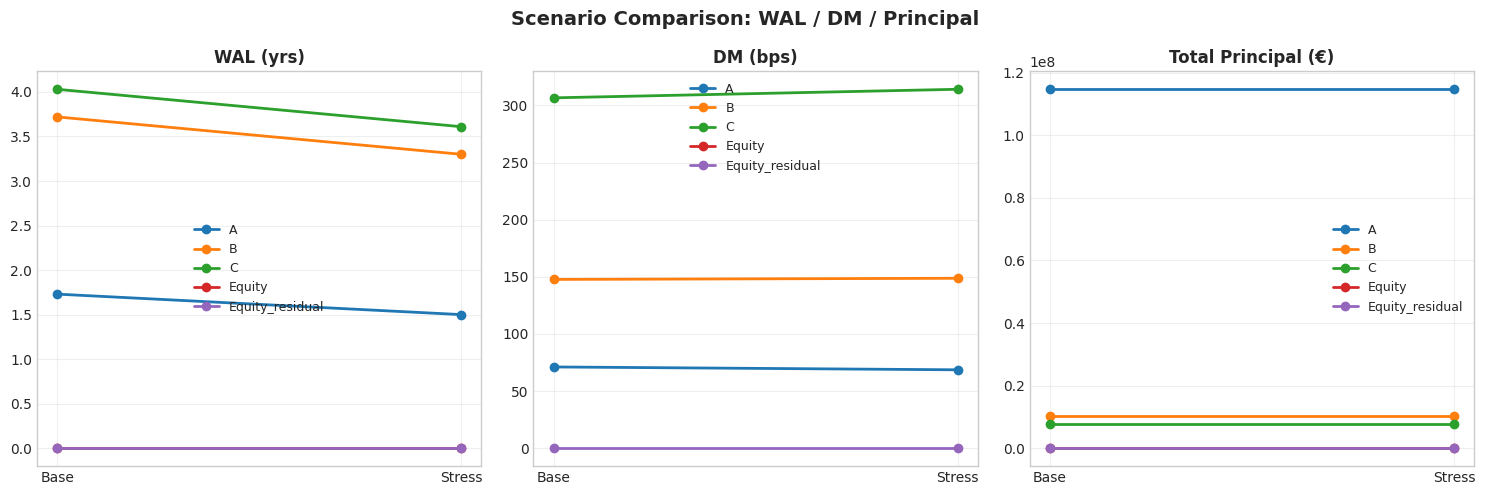


📘 Scenario details: Base

💰 Tranche Repayment Summary
  • A: fully repaid after 42 months (3.50 years)
  • B: fully repaid after 47 months (3.92 years)
  • C: fully repaid after 50 months (4.17 years)
  • Equity: no repayments recorded


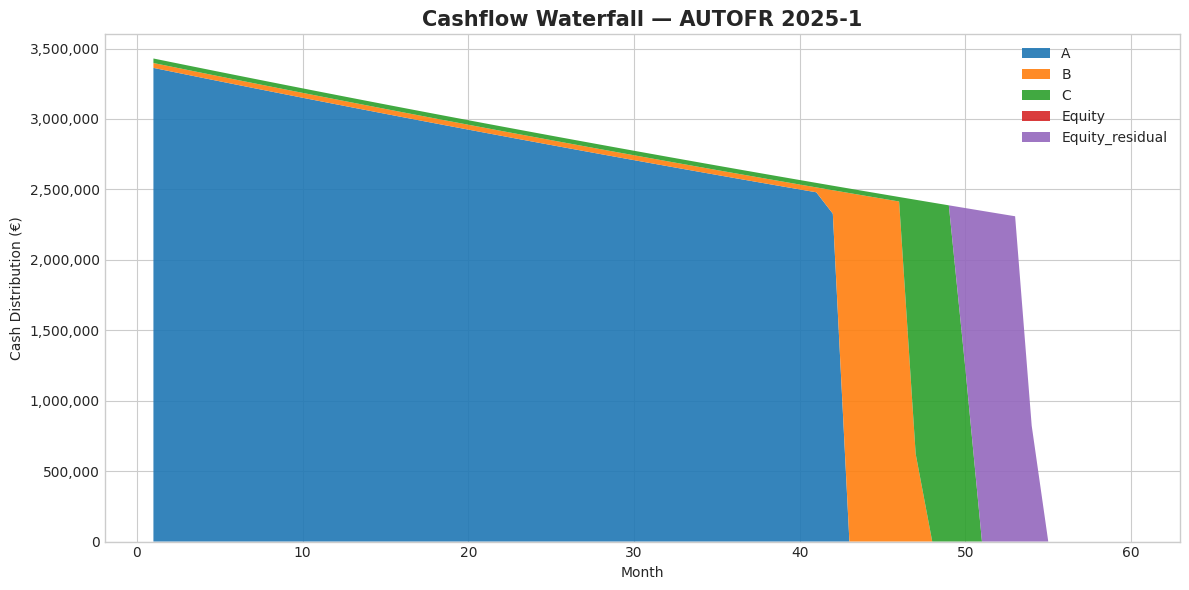

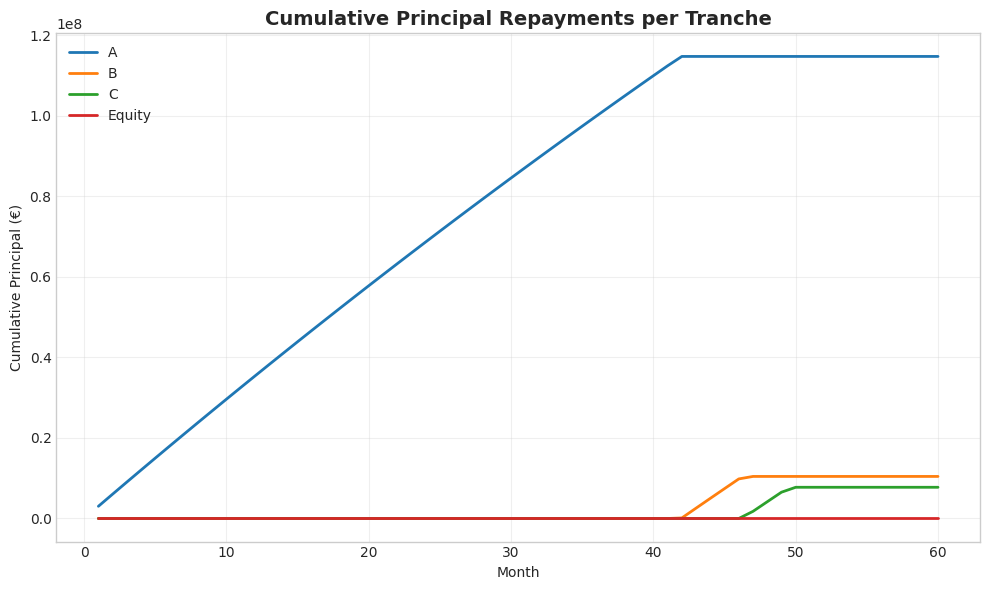

In [9]:
# --- 4️⃣ Compare scenarios visually (WAL / DM / Loss) ---
plot_scenario_summary(df_results)

# --- 5️⃣ Drill down into one specific scenario if desired ---
# Example: re-run “Stress” and visualize full repayment + plots
deal, pool, tranches, _ = load_from_dict(abs_data)
engine = WaterfallEngine(deal, pool, tranches, scenarios[0], base_index_annual=0.026)
engine.simulate()
show_scenario_details(engine)